## Property - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
# #for plotting histogram
#import matplotlib.pyplot as plt
#housing.hist(bins=50, figsize=(20,15))

## Train-Test Spliting

In [9]:
#for better understanding
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
#train_set, test_set = split_train_test(housing, 0.2)

In [11]:
#print(f"Rows in train set : {len(train_set)}\nRows in test set : {len(test_set)}\n")

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set, = train_test_split(housing, test_size = 0.2, random_state=42)
print(f"Rows in train set : {len(train_set)}\nRows in test set : {len(test_set)}\n")

Rows in train set : 404
Rows in test set : 102



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [15]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [16]:
# Making housing as our training dataset by copyin the strat_train_set into our housing dataset
housing = strat_train_set.copy()

## Looking for Correlation

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

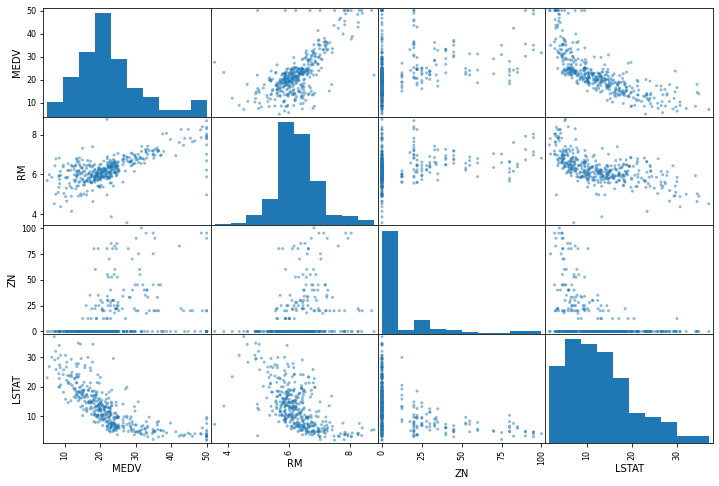

In [17]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

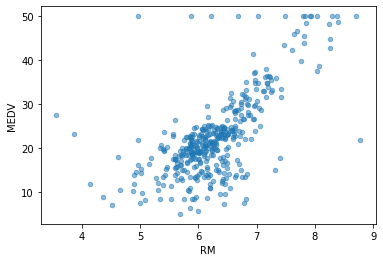

In [18]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.5)

## Trying out Attribute Combinations

In [19]:
# Adding new attribute
# TAXRM -> TAX par RM = TAX / RM
housing['TAXRM'] = housing['TAX']/housing['RM']

In [20]:
housing['TAXRM']

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [21]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528626
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

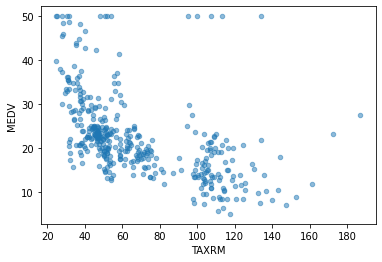

In [22]:
housing.plot(kind="scatter", x='TAXRM', y='MEDV', alpha=0.5)

In [23]:
housing = strat_train_set.drop("MEDV", axis = 1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

In [24]:
# To take care of missing attributes, you have three options:
#     1. Get rid of the missing data points
#     2. Get rid of the whole attribute (if the pearson's correlation coefficient -> 0)
#     3. Set the missin values to some value(0, mean or median)

In [25]:
# Option 1
a = housing.dropna(subset=['RM'])
a.shape
# Note : The original housing dataset is not changed

(399, 13)

In [26]:
# Option 2
housing.drop('RM', axis=1).shape
# we could have also written,
# b = housing.drop('RM', axis=1)
# b.shape

# Note : The original housing dataset is not changed

(404, 12)

In [27]:
# Option 3
medianVal = housing['RM'].median()
c = housing["RM"].fillna(medianVal)
c.shape

# Note : The original housing dataset is not changed

# Things to consider while applying Option 3
# We must also consider the values in the testing dataset while calculating the median
# We must also fill the N\A values in the testing dataset

(404,)

In [28]:
housing.describe()
# Note: The count of RM is less because there are missing values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [30]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [31]:
X = imputer.transform(housing)

In [32]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [33]:
housing_tr.describe()
# Note : The count of RM is now equal with other attributes as imputer has filled the missing values with the median value
# if some other attribut also had some missing values the imputer class would have filled them aslo

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design 

Primarily, three types of objects
1. Estimators - It estimates some parameter based on a dataset. Ex: Imputer. It has a fit method and transform method. Fit method fits the dataset and calculates internal parameters

2. Transformers- Transform method takes input and return output based on the learning from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors -  LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predcitons.

## Feature Scaling

Primarily, two types of feature scaling methods:
1. Min-Max scaling (Normalization)
    (X - min)/(max - min)
    Sklearn provides a class called MinMaxScaler for this
    
2. Standardization
    (X - mean)/std
    Sklearn provides a class called StandardScaler for this

## Creating a Pipeline 

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
#     ............. add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
    
])


In [35]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [36]:
housing_num_tr.shape

(404, 13)

In [37]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

## Selecting a desired model for Property Price Prediction

## 1. Linear Regression Model

In [38]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(housing_num_tr, housing_labels)

LinearRegression()

In [39]:
some_data = housing.iloc[:5]

In [40]:
some_labels = housing_labels.iloc[:5]

In [41]:
prepared_data = my_pipeline.transform(some_data)

In [42]:
lin_model.predict(prepared_data)

array([23.99866812, 27.25283558, 20.5818147 , 25.04908672, 23.77464206])

In [43]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [44]:
from sklearn.metrics import mean_squared_error
lin_housing_predictions = lin_model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels, lin_housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [45]:
lin_rmse

4.835301058716238

##  2. Decision Tree Regressor Model

In [46]:
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor()
dtr_model.fit(housing_num_tr, housing_labels)

DecisionTreeRegressor()

In [47]:
dtr_model.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

## Evaluating the model

In [48]:
dtr_housing_predictions = dtr_model.predict(housing_num_tr)
dtr_mse = mean_squared_error(housing_labels, dtr_housing_predictions)
dtr_rmse = np.sqrt(lin_mse)

In [49]:
dtr_mse

0.0

## Using better evaluation technique - Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score
# DecisionTreeRegressor Scores
dtr_scores = cross_val_score(dtr_model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
dtr_rmse_scores = np.sqrt(-dtr_scores)
# LinearRegressor Scores
lin_scores = cross_val_score(lin_model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [51]:
# LinearRegressor Scores
lin_rmse_scores

array([4.22235612, 4.26438649, 5.09424333, 3.83081183, 5.37600331,
       4.41092152, 7.47272243, 5.48554135, 4.14606627, 6.0717752 ])

In [52]:
# DecisionTreeRegressor Scores
dtr_rmse_scores

array([3.74670587, 5.69321376, 5.12868547, 3.97467593, 4.02802681,
       3.3098716 , 5.09089874, 3.80111826, 3.42749909, 3.44252814])

In [53]:
def print_scores(scores):
    print("Scores : ", scores)
    print("Mean : ", scores.mean())
    print("Standard deviation : ", scores.std())

In [54]:
# LinearRegressor Scores
print_scores(lin_rmse_scores)

Scores :  [4.22235612 4.26438649 5.09424333 3.83081183 5.37600331 4.41092152
 7.47272243 5.48554135 4.14606627 6.0717752 ]
Mean :  5.037482786117751
Standard deviation :  1.0594382405606952


In [55]:
# DecisionTreeRegressor Scores
print_scores(dtr_rmse_scores)

Scores :  [3.74670587 5.69321376 5.12868547 3.97467593 4.02802681 3.3098716
 5.09089874 3.80111826 3.42749909 3.44252814]
Mean :  4.16432236719064
Standard deviation :  0.7925208792624738


## 3. Random Forest Regressor Model

In [56]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor()
rfr_model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [57]:
rfr_model.predict(prepared_data)

array([22.407, 25.341, 16.25 , 23.481, 23.544])

In [58]:
# RandomForestRegressor Scores
rfr_scores = cross_val_score(rfr_model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rfr_rmse_scores = np.sqrt(-rfr_scores)

In [59]:
# RandomForestRegressor Scores
rfr_rmse_scores

array([2.78727442, 2.81200239, 4.64797443, 2.5240456 , 3.38879987,
       2.71788268, 4.69883776, 3.35099493, 2.98301205, 2.97730886])

In [60]:
print_scores(rfr_rmse_scores)

Scores :  [2.78727442 2.81200239 4.64797443 2.5240456  3.38879987 2.71788268
 4.69883776 3.35099493 2.98301205 2.97730886]
Mean :  3.2888132978829967
Standard deviation :  0.7368597255126655


## Saving the Model

In [61]:
from joblib import dump, load
dump(rfr_model, "RFR_Price_prediction_Model.joblib")

['RFR_Price_prediction_Model.joblib']

## Testing the Model on test Data

In [63]:
X_test = strat_test_set.drop("MEDV", axis = 1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = rfr_model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [64]:
final_rmse

2.9648235473071

In [65]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])